In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as sco
import numpy_linalg as la

In [2]:
import sl_py_tools.matplotlib_tricks as mplt
import sl_py_tools.numpy_tricks.markov as ma
import sl_py_tools.numpy_tricks.markov_param as mp

In [3]:
import complex_synapse as cs

In [4]:
from sl_py_tools.import_tricks import reload

In [5]:
np.set_printoptions(precision=3, suppress=False, linewidth=90)

In [20]:
serial = cs.SynapseMemoryModel.build(cs.builders.build_serial, 12, jmp=0.7)
cascade = cs.SynapseMemoryModel.build(cs.builders.build_cascade, 12, jmp=0.7)

In [21]:
t = la.geomspace(0.1, 1e4, 50)
serial_snr = serial.snr_exp_ave(t)
cascade_snr = cascade.snr_exp_ave(t)

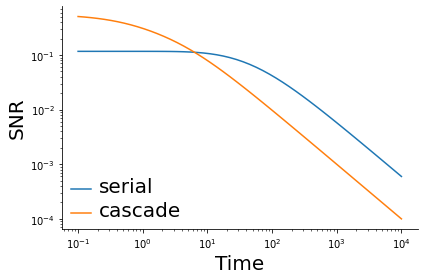

In [22]:
plt.loglog(t, serial_snr, label='serial')
plt.loglog(t, cascade_snr, label='cascade')
ax = plt.gca()
ax.set_xlabel("Time")
ax.set_ylabel("SNR")
lg = ax.legend(loc="lower left")
mplt.clean_axes(ax)

In [6]:
nst = 10
s = la.geomspace(1e-4, 10, 50)
options = {'repeats': 10, 'method': 'SLSQP'}

In [27]:
envelope_srl, models_srl = cs.optimise.optim_laplace_range(s, nst, serial=True, **options)
envelope_gen, models_gen = cs.optimise.optim_laplace_range(s, nst, serial=False, **options)

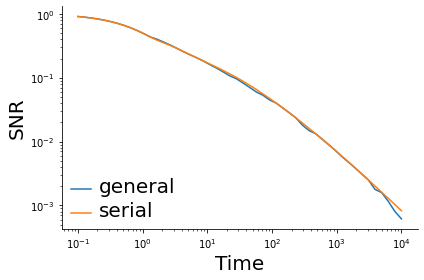

In [28]:
plt.loglog(1/s, envelope_gen * s, label='general')
plt.loglog(1/s, envelope_srl * s, label='serial')
ax = plt.gca()
ax.set_xlabel("Time")
ax.set_ylabel("SNR")
lg = ax.legend(loc="lower left")
mplt.clean_axes(ax)

In [7]:
senvelope_gen, smodels_gen = cs.soptimise.optim_laplace_range(s, nst, serial=False, **options)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 180 and the array at index 1 has size 90

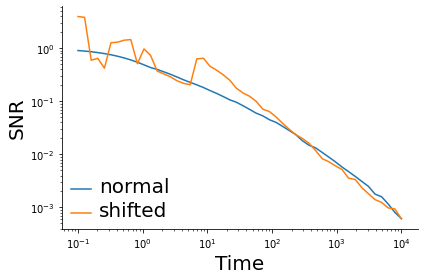

In [10]:
plt.loglog(1/s, envelope_gen * s, label='normal')
plt.loglog(1/s, senvelope_gen * s, label='shifted')
ax = plt.gca()
ax.set_xlabel("Time")
ax.set_ylabel("SNR")
lg = ax.legend(loc="lower left")
mplt.clean_axes(ax)

In [11]:
np.savez_compressed("optim", s=s, envelope_gen=envelope_gen, envelope_srl=envelope_srl, models_gen=models_gen, models_srl=models_srl, senvelope_gen=senvelope_gen, smodels_gen=smodels_gen, nst=nst, options=options)

In [6]:
saved = np.load('optim.npz', allow_pickle=True)
s = saved['s']
envelope_gen = saved['envelope_gen']
envelope_srl = saved['envelope_srl']
senvelope_gen = saved['senvelope_gen']
models_gen = saved['models_gen']
models_srl = saved['models_srl']
smodels_gen = saved['smodels_gen']
options = saved['options'][()]
nst = saved['nst'][()]
saved.close()

In [22]:
rconds = cs.optimise.check_rcond_range(s, smodels_gen, serial=False)
rconds

lnarray([2.347e-04, 1.402e-04, 1.431e-04, 1.022e-04, 1.441e-04, 1.305e-04, 1.468e-04,
         2.297e-04, 1.232e-04, 1.638e-04, 1.569e-04, 2.124e-04, 1.446e-04, 1.538e-04,
         1.467e-04, 1.723e-04, 1.992e-04, 1.046e-04, 1.109e-04, 2.426e-04, 1.030e-04,
         1.516e-04, 2.674e-04, 1.322e-04, 1.099e-04, 1.793e-04, 1.036e-04, 1.003e-04,
         1.542e-02, 1.744e-02, 3.993e-02, 4.042e-02, 2.756e-02, 5.228e-02, 5.627e-02,
         1.384e-01, 7.701e-02, 1.383e-01, 1.798e-01, 2.022e-01, 2.304e-01, 2.663e-01,
         2.970e-01, 3.619e-01, 3.941e-01, 5.145e-01, 6.261e-01, 4.385e-01, 8.611e-01,
         3.343e-01])

In [23]:
s * senvelope_gen

lnarray([6.299e-04, 7.918e-04, 9.575e-04, 1.278e-03, 1.590e-03, 1.948e-03, 2.411e-03,
         3.049e-03, 3.713e-03, 5.349e-03, 6.151e-03, 7.685e-03, 9.789e-03, 1.207e-02,
         1.457e-02, 1.920e-02, 2.386e-02, 3.010e-02, 3.967e-02, 4.752e-02, 6.185e-02,
         6.925e-02, 9.105e-02, 1.125e-01, 1.515e-01, 1.518e-01, 2.170e-01, 2.261e-01,
         1.421e-01, 1.738e-01, 1.761e-01, 1.940e-01, 2.881e-01, 2.542e-01, 2.972e-01,
         2.836e-01, 3.612e-01, 3.853e-01, 4.846e-01, 5.481e-01, 5.855e-01, 6.888e-01,
         8.385e-01, 9.711e-01, 9.776e-01, 1.029e+00, 1.151e+00, 1.579e+00, 3.147e+00,
         2.533e+00])

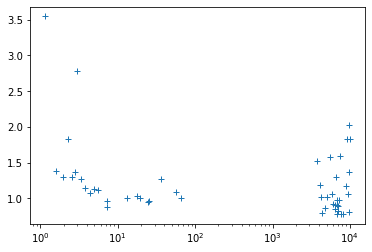

In [26]:
plt.semilogx(1 / rconds, senvelope_gen/envelope_gen, '+')

In [ ]:
cs.optimise.reoptim_laplace_range([0, 9], s, models_gen, envelope_gen, serial=False, **options)

In [8]:
reload(cs)
reload(mp)

Reloading complex_synapse.synapse_memory_model
Reloading sl_py_tools.numpy_tricks
Reloading complex_synapse.synapse_base
Reloading complex_synapse.builders
Reloading complex_synapse.synapse_opt
Reloading complex_synapse.optimise
Reloading sl_py_tools.iter_tricks
Reloading sl_py_tools.containers
Reloading sl_py_tools.display_tricks
Reloading sl_py_tools.iter_disp
Reloading sl_py_tools.range_tricks
Reloading sl_py_tools.abc_tricks
Reloading sl_py_tools.modular_arithmetic
Reloading sl_py_tools.integer_tricks
Reloading sl_py_tools.arg_tricks
Reloading sl_py_tools.slice_tricks
Reloading sl_py_tools.numpy_tricks.markov
Reloading sl_py_tools.numpy_tricks
Reloading sl_py_tools.numpy_tricks.logic
